###Identify fraudulent Transactions ###

In [4]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Synthetic_Financial_datasets_log.csv')
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Plot histogram

### Subtask:
Create a histogram to visualize the number of fraudulent and non-fraudulent transactions.


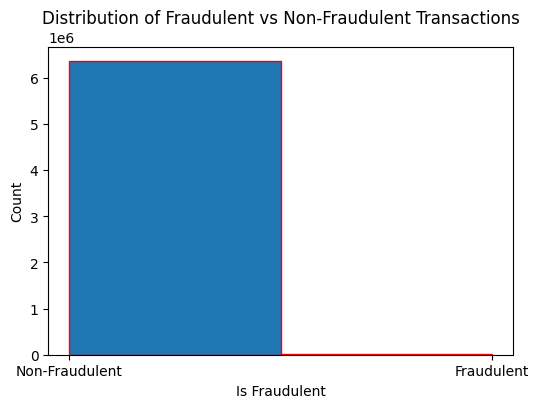

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(df['isFraud'], bins=2, edgecolor='red')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

## Prepare data for pie chart

### Subtask:
Calculate the counts of each transaction type and the split between fraudulent and non-fraudulent transactions within each type.


**Method**:
Calculate the counts of each transaction type and the split between fraudulent and non-fraudulent transactions within each type.



In [6]:
df.dropna(inplace=True)
transaction_type_counts = df['type'].value_counts()
transaction_type_fraud_split = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
display(transaction_type_counts)
display(transaction_type_fraud_split)

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


## Plot pie chart

### Subtask:
Generate a Plotly pie chart to visualize the distribution of transaction types and the fraud split within each type.


In [7]:
import plotly.express as px
import pandas as pd

# Pie chart for distribution of transaction types
fig1 = px.pie(values=transaction_type_counts.values,
              names=transaction_type_counts.index,
              title='Distribution of Transaction Types')
fig1.show()

# Prepare data for the sunburst chart
# Melt the dataframe to have transaction type, fraud status, and count in separate columns
df_melted = transaction_type_fraud_split.reset_index().melt(id_vars='type', var_name='isFraud', value_name='count')
df_melted['isFraud'] = df_melted['isFraud'].apply(lambda x: 'Fraudulent' if x == 1.0 else 'Non-Fraudulent')

# Create a new dataframe for the sunburst chart with explicit ids, parents, and values
df_sunburst = pd.DataFrame(columns=['ids', 'parents', 'values'])

# Add transaction types as outer layer
for index, row in transaction_type_counts.items():
    df_sunburst.loc[len(df_sunburst)] = [index, '', row]

# Add fraudulent and non-fraudulent counts within each type as inner layer
for index, row in df_melted.iterrows():
    df_sunburst.loc[len(df_sunburst)] = [f"{row['type']}_{row['isFraud']}", row['type'], row['count']]

display(df_sunburst)



,ids,parents,values
0,CASH_OUT,,2237500
1,PAYMENT,,2151495
2,CASH_IN,,1399284
3,TRANSFER,,532909
4,DEBIT,,41432
5,CASH_IN_Non-Fraudulent,CASH_IN,1399284
6,CASH_OUT_Non-Fraudulent,CASH_OUT,2233384
7,DEBIT_Non-Fraudulent,DEBIT,41432
8,PAYMENT_Non-Fraudulent,PAYMENT,2151495
9,TRANSFER_Non-Fraudulent,TRANSFER,528812


# Task
Load the dataset "Syntetic_financial_dataset" from the "sample_data" directory, plot a histogram of fraudulent and non-fraudulent transactions, and create a double pie chart using Plotly showing the distribution of transaction types and the fraudulent/non-fraudulent split within each type. Then, prepare the data for machine learning, split it into training and testing sets, train a classification model, evaluate its accuracy, rebalance the dataset to address class imbalance, split the rebalanced data, train the model again, and evaluate its accuracy to compare the results.

## Prepare data for ml

### Subtask:
Select features and target variable for the model.


**Reasoning**:
Select the features and target variable for the model based on the instructions.



In [8]:
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

## Split data (initial)

### Subtask:
Split the data into training and testing sets using a standard random split.


**Reasoning**:
Split the data into training and testing sets using train_test_split with a test size of 0.2 and a random_state of 42.



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning**:
Import the necessary libraries for model training and evaluation, instantiate a Logistic Regression model, train it on the training data, make predictions on the test data, and calculate the accuracy score.



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model on imbalanced data: {accuracy}")

ValueError: could not convert string to float: 'CASH_IN'

**Reasoning**:
The previous command failed because the 'type' column in the features DataFrame `X_train` contains string values ('CASH_OUT', 'PAYMENT', etc.) which cannot be directly used by the Logistic Regression model. I need to convert these categorical features into numerical format using one-hot encoding.



**Reasoning**:
Apply one-hot encoding to the 'type' column and then train and evaluate the Logistic Regression model as instructed.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Re-split the data to ensure 'type' column is present
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply one-hot encoding to the 'type' column
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['type']])
X_test_encoded = encoder.transform(X_test[['type']])

# Convert encoded features to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['type']), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['type']), index=X_test.index)

# Drop the original 'type' column
X_train = X_train.drop('type', axis=1)
X_test = X_test.drop('type', axis=1)

# Concatenate the encoded features with the remaining features
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Ensure all column names are strings before fitting the model
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Drop any remaining NaN values from the training and testing sets - this step is crucial
X_train.dropna(inplace=True)
y_train = y_train[X_train.index] # Align y_train with the cleaned X_train indices
X_test.dropna(inplace=True)
y_test = y_test[X_test.index] # Align y_test with the cleaned X_test indices


# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model on imbalanced data: {accuracy}")

Accuracy of the Logistic Regression model on imbalanced data: 0.9992848857860441


##  Where is the catch?

### Think: of how you could have obtained a similar model?:



In [12]:
# Calculate a dummy accuracy that assumes the prediction is always false
dummy_accuracy = (y_test == 0).mean()
print(f"Dummy Accuracy: {dummy_accuracy}")

Dummy Accuracy: 0.9987269395311994


## Ok that was underwhelming, How can we make sure we are effective?

First let's visualize accuracy differently, let's use a confusion matrix


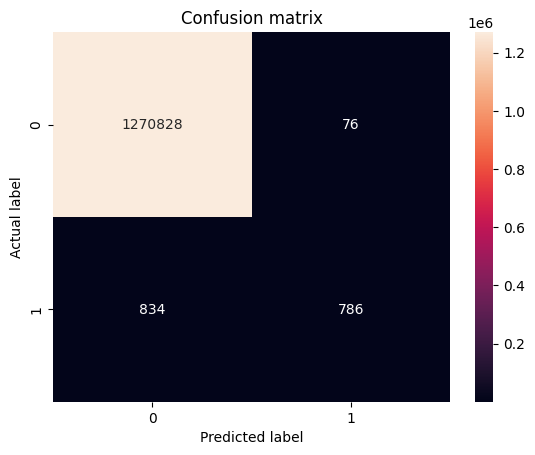

In [13]:
# calculate confusion matrix for the previous algorithm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# and actually calculate it and plot it
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Now let's fix the issue

We biased the algorithm as we showed it way more negative examples, therefore penalizing more false positive than false negative, let's rebalance the training set



Apply SMOTE to the training data to rebalance the classes.



In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

#Display the train dataset grouped by fraud/non fraud
display(y_train_resampled.value_counts())
display(y_test_resampled.value_counts())







,count
isFraud,
0,5083503
1,5083503


,count
isFraud,
0,1270904
1,1270904


## Train and evaluate model (rebalanced)


Train the classification model on the rebalanced data and evaluate its accuracy.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model_resampled.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"Accuracy of the Logistic Regression model on rebalanced data: {accuracy_resampled}")


Accuracy of the Logistic Regression model on rebalanced data: 0.9552094414684351


## And the respective confusion matrix

<Axes: >

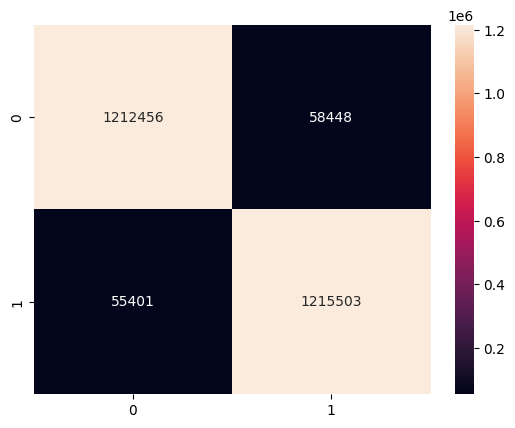

In [16]:
# Calculate and plot the confusion matrix with these new examples
cm_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
sns.heatmap(cm_resampled, annot=True, fmt='d')

In [17]:
# now see the performance on the original non-balanced split
y_pred_original = model_resampled.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of the Logistic Regression model on original data: {accuracy_original}")

Accuracy of the Logistic Regression model on original data: 0.9539953666885654


## Now let's compare other models

Let's see how other models perform


In [18]:
#import skilern models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#create each model
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()



In [20]:
#train them
#rf_model.fit(X_train_resampled, y_train_resampled)
#svm_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

#test them
#rf_pred = rf_model.predict(X_test_resampled)
#svm_pred = svm_model.predict(X_test_resampled)
xgb_pred = xgb_model.predict(X_test_resampled)

#evaluate them
#rf_accuracy = accuracy_score(y_test_resampled, rf_pred)
#svm_accuracy = accuracy_score(y_test_resampled, svm_pred)
xgb_accuracy = accuracy_score(y_test_resampled, xgb_pred)

#print(f"Random Forest Accuracy: {rf_accuracy}")
#print(f"SVM Accuracy: {svm_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.9973727362570265


And of course the confusion matrix


<Axes: >

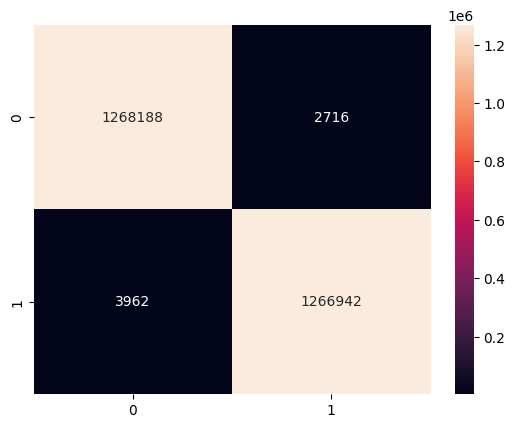

In [21]:
# plot the confusino matrix for xgb
cm_xgb = confusion_matrix(y_test_resampled, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d')

## Feature Importance

### Subtask:
Extract and display the feature importance from the trained Logistic Regression model.

**Reasoning**:
Access the coefficients of the trained Logistic Regression model (`model_resampled`) and pair them with the feature names to display their importance.

In [22]:
# Get feature importance from xgb
feature_importances = xgb_model.feature_importances_
feature_names = X_train_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)


,Feature,Importance
3,newbalanceOrig,0.652393
9,type_PAYMENT,0.208465
2,oldbalanceOrg,0.054695
10,type_TRANSFER,0.026015
1,amount,0.021997
7,type_CASH_OUT,0.013192
5,newbalanceDest,0.010510
8,type_DEBIT,0.007080
0,step,0.003676
4,oldbalanceDest,0.001340


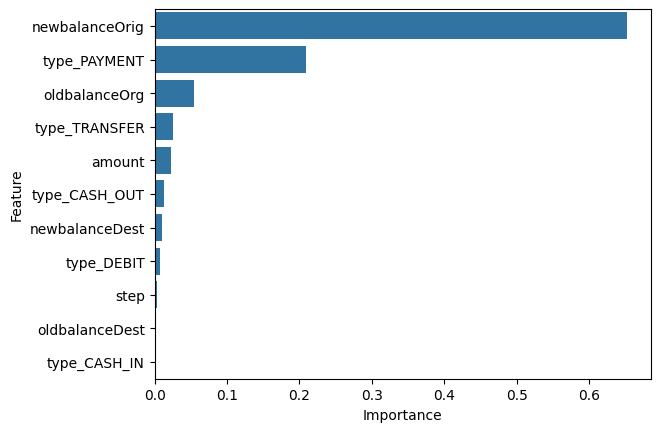

In [23]:
plot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
